In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
db_pelota = pd.read_csv(r'C:\Users\satel\OneDrive\Universidad\Fisica II\damped-oscillator-graph\Pendulo_Pelota.csv', sep=";")
db_piedra = pd.read_csv(r'C:\Users\satel\OneDrive\Universidad\Fisica II\damped-oscillator-graph\Pendulo_Piedra.csv', sep=";")

db_piedra.head(100)

,t,x,Posicion Y,Angulo de Rotacion,Angulo de posicion,Velocidad Angular,magnitud de la posicion-R,step
0,"2,47E+00","-2,27E-01","-9,54E-01","-1,80E+00","-1,80E+00",NaN,"9,80E-01","1,80E+01"
1,"2,60E+00","-1,43E-01","-9,69E-01","-1,72E+00","-1,72E+00","7,41E-01","9,80E-01","1,90E+01"
2,"2,74E+00","-3,38E-02","-9,78E-01","-1,61E+00","-1,61E+00","8,47E-01","9,79E-01","2,00E+01"
3,"2,87E+00","7,97E-02","-9,75E-01","-1,49E+00","-1,49E+00","8,06E-01","9,78E-01","2,10E+01"
4,"3,01E+00","1,77E-01","-9,58E-01","-1,39E+00","-1,39E+00","5,87E-01","9,74E-01","2,20E+01"
...,...,...,...,...,...,...,...,...
95,"1,52E+01","-2,36E-01","-9,40E-01","-1,82E+00","-1,82E+00","-3,15E-01","9,69E-01","1,13E+02"
96,"1,54E+01","-2,45E-01","-9,37E-01","-1,83E+00","-1,83E+00","1,24E-01","9,68E-01","1,14E+02"
97,"1,55E+01","-2,05E-01","-9,47E-01","-1,78E+00","-1,78E+00","5,16E-01","9,69E-01","1,15E+02"
98,"1,56E+01","-1,14E-01","-9,73E-01","-1,69E+00","-1,69E+00","7,43E-01","9,80E-01","1,16E+02"


In [20]:
# def num(numero_str):
#     if type(numero_str) == float:
#         print("aluja")
#     return float(numero_str.replace(",","."))

# # Ahora ocupa esa funcion para cambiar todos los numeros de una dataframe en las columnas 't' y 'x'
# db_piedra['t'] = db_piedra['t'].apply(num)
# db_piedra['x'] = db_piedra['x'].apply(num)
# db_piedra.head()


In [22]:
plt.figure(figsize=(30,10))
plt.plot(db_piedra['t'], db_piedra['x'])


Error in callback <function flush_figures at 0x000002132E7D7A60> (for post_execute):


KeyboardInterrupt: 

In [1]:
def maxmin(db):
    disminuye = True
    minimos = []
    maximos = []
    for i in range(1, len(db['x'])):
        ant = db['x'][i-1]
        if disminuye:
            if ant < db['x'][i]:
                val = db['x'][i]
                minimos.append(val)
                maximos.append(0)

            elif ant > db['x'][i]:
                val = db['x'][i]
                maximos.append(val)
                minimos.append(0)
            else:
                minimos.append(0)
                maximos.append(0)
                
    minimos_real = []
    for i in range(1, len(minimos)):
        # minimos
        ant_min = minimos[i-1]
        if minimos[i] == 0:
            minimos_real.append(None)
            continue
        elif ant_min > minimos[i]:
            minimos_real.append(minimos[i])
        else:
            minimos_real.append(None)

    maximos_real = []
    for i in range(1, len(maximos)):
        # maximos
        ant_max = maximos[i-1]
        if maximos[i] == 0:
            maximos_real.append(None)
            continue
        elif ant_max < maximos[i]:
            maximos_real.append(maximos[i])
        else:
            maximos_real.append(None)
    
    return maximos_real, minimos_real, db

maximos_real, minimos_real, db = maxmin(db_pelota)


NameError: name 'db_pelota' is not defined

C:\Users\satel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: array length 3673 does not match index length 5648

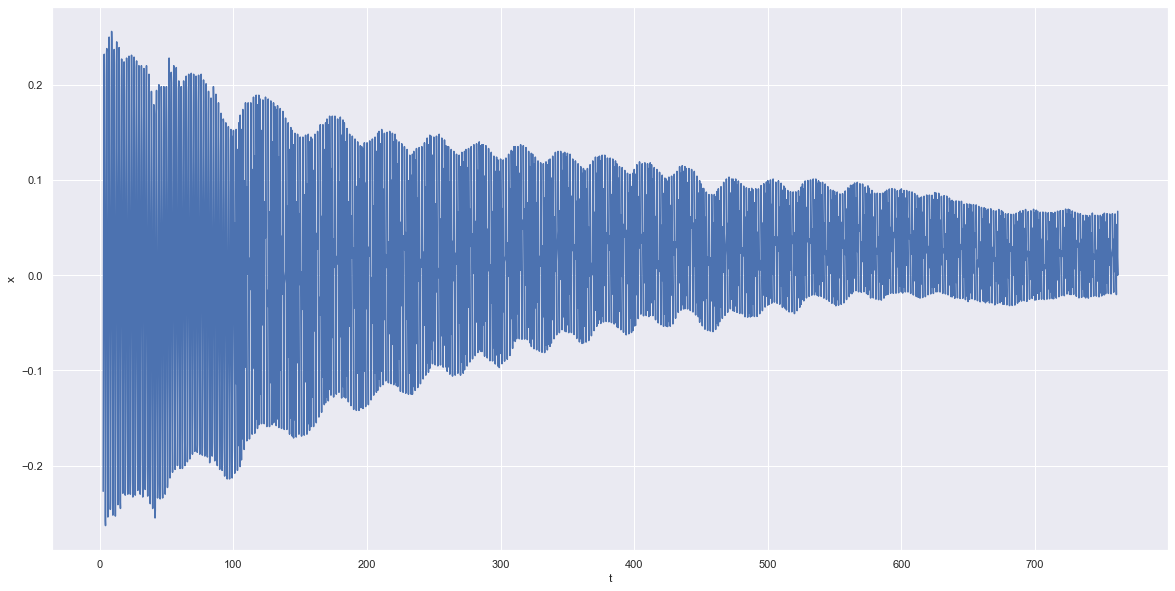

In [ ]:
def graph(db):
    # print(len(db['t'][2:]))
    # print(len(minimos_real))

    sns.set(rc={'figure.figsize':(20,10)})
    sns.lineplot(x='t', y='x', data=db, estimator=None)
    sns.lineplot(db['t'][2:],minimos_real, linewidth = 5)
    sns.lineplot(db['t'][2:],maximos_real, linewidth = 5)


    # ponle titulo: movimiento en el eje X de una pelota de tenis a través del tiempo.
    plt.title(f'Movimiento en el eje X de una piedra a través del tiempo', fontsize=30)

    # ponle nombre a los ejes
    plt.xlabel('Tiempo (s)', fontsize=25)
    plt.ylabel('Posición (m)', fontsize=25)

    # ponle una leyenda
    plt.legend(['Posición','Mínimos','Máximos'], fontsize=25)
graph(maxmin(db_piedra))

In [ ]:
maxs = []
for i in maximos_real:
    if i:
        maxs.append(i)
print(maxs)

mins = []
for i in minimos_real:
    if i:
        mins.append(i)
print(mins)

[0.19, 0.174, 0.154, 0.182, 0.165, 0.155, 0.176, 0.171, 0.155, 0.133, 0.156, 0.147, 0.138, 0.126, 0.152, 0.137, 0.128, 0.149, 0.139, 0.126, 0.109, 0.128, 0.123, 0.106, 0.125, 0.126, 0.113, 0.098, 0.119, 0.109, 0.098, 0.112, 0.106, 0.0973, 0.0862, 0.103, 0.0947, 0.0764, 0.108, 0.096, 0.0843, 0.0976, 0.102, 0.0915, 0.0797, 0.0975, 0.0881, 0.0796, 0.0954, 0.0896, 0.0797, 0.0954, 0.086, 0.0795, 0.0895, 0.0835, 0.072, 0.0649, 0.0751, 0.0634, 0.0569, 0.0701, 0.065, 0.0633, 0.0778, 0.0765, 0.0735, 0.0698, 0.0863, 0.0778, 0.0671, 0.075, 0.0646, 0.0519, 0.0618, 0.0549, 0.0454, 0.0567, 0.0521, 0.0518, 0.0471, 0.0666, 0.065, 0.0617, 0.0767, 0.0699, 0.0604, 0.0714, 0.0603, 0.0535, 0.0601, 0.055, 0.0503, 0.0618, 0.0582, 0.0568, 0.0518, 0.0647, 0.0627, 0.0555, 0.0634, 0.0583, 0.0522, 0.062, 0.0552, 0.0469, 0.0534, 0.047, 0.0409, 0.037, 0.0483, 0.0473, 0.0421, 0.055, 0.0506, 0.0443, 0.055, 0.0505, 0.0439, 0.0519, 0.0486, 0.0405, 0.045, 0.0408, 0.0343, 0.0273, 0.0404, 0.0363, 0.0312, 0.0399, 0.0346, 0